In [1]:
import pandas as pd
from pandas import read_csv

In [3]:
fileName = "Energy Meter.csv"
names = ['Voltage', 'Current', 'Power', 'Meter']
dataset = read_csv(fileName, names=names)

In [5]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('Meter').size())

(400, 4)
    Voltage  Current  Power   Meter
0    0.0000      0.0    0.0  NoLoad
1    0.0000      0.0    0.0  NoLoad
2    0.0000      0.0    0.0  NoLoad
3    0.0000      0.0    0.0  NoLoad
4    0.0000      0.0    0.0  NoLoad
5    0.0000      0.0    0.0  NoLoad
6    0.0000      0.0    0.0  NoLoad
7    0.3833      0.0    0.0  NoLoad
8    0.0000      0.0    0.0  NoLoad
9    0.0000      0.0    0.0  NoLoad
10   0.0000      0.0    0.0  NoLoad
11   0.0000      0.0    0.0  NoLoad
12   0.0000      0.0    0.0  NoLoad
13   0.0000      0.0    0.0  NoLoad
14   0.0000      0.0    0.0  NoLoad
15   0.0000      0.0    0.0  NoLoad
16   0.0000      0.0    0.0  NoLoad
17   0.0000      0.0    0.0  NoLoad
18   0.0000      0.0    0.0  NoLoad
19   0.0000      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.07

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

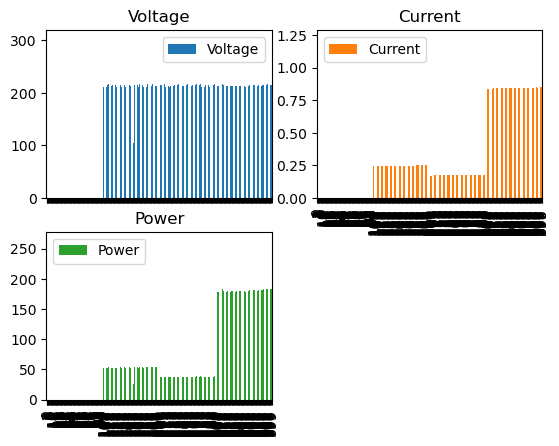

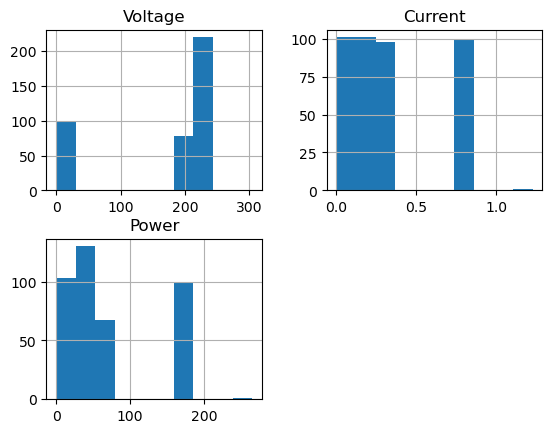

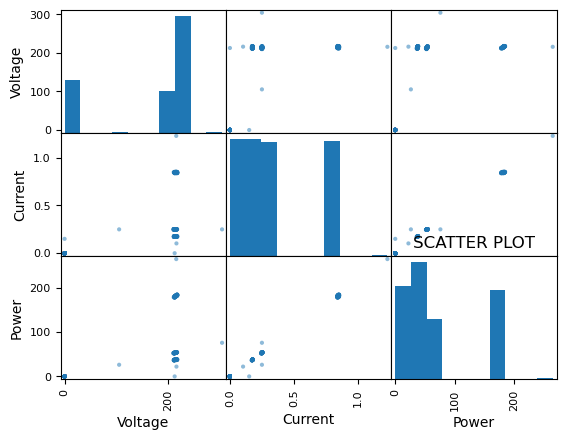

In [9]:
dataset.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('BAR PLOT')
pyplot.show()

dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

scatter_matrix(dataset)
pyplot.title('SCATTER PLOT')
pyplot.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [13]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [15]:
models =[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.996875 (0.009375)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


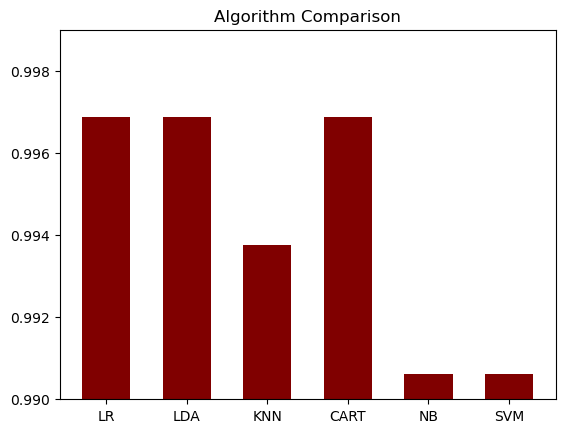

In [19]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)  
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')  
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990,.999)
pyplot.bar(names, res, color = 'maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()